# Conhecendo os Dados

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pesquisa = pd.read_csv('resultados-pesquisa-anonimizado.csv')
pesquisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                      --------------  ----- 
 0   Carimbo de data/hora                                                                                                                        25 non-null     object
 1   Qual sua atual ocupação (profissão ou estudante)?                                                                                           23 non-null     object
 2   Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?                                              25 non-null     object
 3   Que tipo de informação você ESPERA encontrar no Dados

In [29]:
pesquisa.describe()

,Carimbo de data/hora,Qual sua atual ocupação (profissão ou estudante)?,Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?,Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter),Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter),O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?,Quais sites você usa ou já usou para pesquisar esses dados?
count,25,23,25,25,24,25,9
unique,25,20,6,25,24,25,8
top,5/17/2020 5:38:20,Professora,Todos os dias,Despesas com saude e educação,O que é gasto por cada secretaria e onde é apl...,A transparência.,Acorda cidade
freq,1,3,9,1,1,1,2


Inicialmente, podemos ver que todos os campos do resultado da pesquisa consistem de objetos, provavelmente representando informações textuais. Isso também é resultado da forma como os dados foram armazenados na planilha no Google Sheets.

Analisando as colunas, podemos considerar que a informação de data/hora da resposta da pesquisa pode ser descartada, já que não traz um dado que possa ser analisado em conjunto com os demais, representando apenas o momento em que aquela resposta foi preenchida.

A maioria das demais colunas possuem quase que todos os registros com valores únicos. Supondo que isso seja resultado da inserção da informação por um campo de texto, podemos tentar analisar respostas que sejam semelhantes e agrupá-las, criando categorias que possam ser mais úteis para a análise.

A coluna que menos apresenta valores únicos para os seus registros é a pergunta <i>"Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?"</i>. Supondo que a pergunta tenha disponibilizado opções para resposta, isso faz sentido. Ainda assim, a pergunta supõe uma ordenação entre as respostas, que buscaremos evidenciar.

In [30]:
pesquisa.drop(['Carimbo de data/hora'], axis=1, inplace=True)

# Limpeza e Exibição dos Dados

## Ocupação

In [31]:
pesquisa['Qual sua atual ocupação (profissão ou estudante)? '].unique()

array([nan, 'Representante', 'Recepcionista', 'Professora',
       'Publicitário e locutor ', 'Promotor de Vendas',
       'Polícial Militar', 'Community Manager', 'Publicitária',
       'Estudante', 'Policial militar ', 'Professora ', 'Estudante ',
       'Bombeiro militar ', 'Professor', 'Desenvolvedor', 'Jornalista',
       'Jornalista ', 'Servidor Público', 'Desenvolvedor ', 'Empresário '],
      dtype=object)

Vendo os resultados únicos e o texto da coluna para a pergunta sobre ocupação, podemos fazer uma breve limpeza nos dados e classificação, criando uma nova coluna.

In [32]:
pesquisa['OCUPACAO'] = pesquisa['Qual sua atual ocupação (profissão ou estudante)? '].fillna('Não informado').apply(str.strip).apply(str.title)

In [33]:
pesquisa['OCUPACAO'].sort_values().unique()

array(['Bombeiro Militar', 'Community Manager', 'Desenvolvedor',
       'Empresário', 'Estudante', 'Jornalista', 'Não Informado',
       'Policial Militar', 'Polícial Militar', 'Professor', 'Professora',
       'Promotor De Vendas', 'Publicitária', 'Publicitário E Locutor',
       'Recepcionista', 'Representante', 'Servidor Público'], dtype=object)

Analisando novamente as profissões, podemos considerar algumas categorias.

"Bombeiro Militar", "Policial Militar" e "Polícial Militar" podem ser agrupados em uma categoria "Militar".

"Professor" e "Professora" podem ser agrupados em "Professor/Professora".

"Promotor De Vendas" e "Representante" podem ser agrupados em "Vendas".

"Publicitária" e "Publicitário E Locutor" podem ser agrupados em "Publicitário/Publicitária".

As demais ocupações não parecem se agrupar naturalmente. 

In [34]:
def categorize_profession(profession):
    if 'militar' in profession.lower():
        return 'Militar'
    if 'professor' in profession.lower():
        return 'Professor/Professora'
    if profession in ('Promotor De Vendas', 'Representante'):
        return 'Vendedor/Representante'
    if 'publicit' in profession.lower():
        return 'Publicitário/Publicitária'
    if 'community manager' in profession.lower():
        return 'Organizador de Comunidade'
    else:
        return profession

pesquisa['OCUPACAO_CATEGORY'] = pesquisa['OCUPACAO'].apply(categorize_profession)

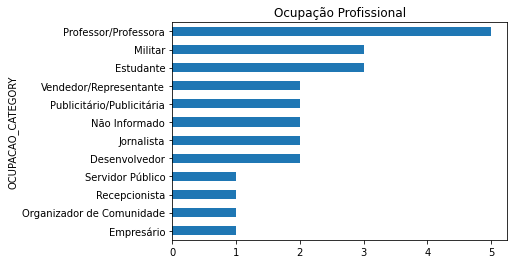

In [35]:
pesquisa.groupby('OCUPACAO_CATEGORY').size().sort_values().plot(kind='barh', title='Ocupação Profissional')

## Frequência de Busca de Informações

In [36]:
pesquisa.loc[pesquisa['Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?'] == 'Depende da semana, mas geralmente mais de uma vez por semana. ', 'Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?'] = 'Mais de 1 vez por semana'

In [37]:
pesquisa['Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?'].unique()

array(['1 vez por semana', 'Todos os dias', 'Mais de 1 vez por semana',
       '1 vez por mês', 'Nunca busquei', 'Quase nunca'], dtype=object)

In [38]:
pesquisa['Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?'].value_counts()

Todos os dias               9
1 vez por semana            7
1 vez por mês               3
Quase nunca                 3
Nunca busquei               2
Mais de 1 vez por semana    1
Name: Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?, dtype: int64

As informações já estão bem descritas, e podemos exibir os dados de forma ordenada.

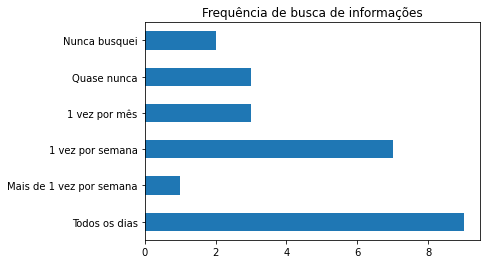

In [39]:
order = ['Todos os dias', 'Mais de 1 vez por semana', '1 vez por semana', '1 vez por mês', 'Quase nunca', 'Nunca busquei']
pesquisa['Com qual frequência você busca por informações fornecidas pela prefeitura de Feira de Santana?'].value_counts().reindex(order).plot(kind='barh', title='Frequência de busca de informações')

## Expectativa das Informações

In [40]:
pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].value_counts()

Despesas com saude e educação                                                                                                                                                                                                  1
Informações referente a saúde e segurança do município de Feira de Santana.                                                                                                                                                    1
Gastos públicos                                                                                                                                                                                                                1
Informações atualizadas de como está sendo empregado o dinheiro público e também do dinheiro que não está sendo utilizado.                                                                                                     1
Verbas, investimentos, receitas, despesas...                                                        

Podemos notar que todas as respostas são distintas entre si, provavelmente resultado da coleta através de uma caixa de texto.

Assim como fizemos em outras perguntas, podemos estabelecer categorias através de palavras-chave. Como a quantidade de respostas não é muito extensa, é possível fazer uma análise em cada uma das respostas.

Em uma observação das respostas, podemos estabelecer as seguintes categorias:

1. Investimentos (infraestrutura, despesas gerais, salário);
2. Saúde;
3. Educação;
4. Segurança;
5. Orçamento (verba);
6. Transparência;
7. Outros;

Uma resposta pode estar representada em mais de uma categoria. Assim, a soma das categorias pode ser maior que a quantidade de respostas obtidas.

In [41]:
def categorize_expectation_public_investments(answer):
    if any(x in answer.lower() for x in ['servidor', 'investimento', 'obra', 'urbanizaçao', 'salário', 'compra', 'dinheiro', 'bairro', 'recurso', 'gasto', 'licitação', 'licitaçao', 'licitações']):
        return 1
    return 0

def categorize_expectation_public_health(answer):
    if any(x in answer.lower() for x in ['saude', 'saúde']):
        return 1
    return 0

def categorize_expectation_public_education(answer):
    if any(x in answer.lower() for x in ['educacao', 'educação', 'educaçao', 'educacão', 'escola', 'colégio', 'colegio']):
        return 1
    return 0

def categorize_expectation_public_safety(answer):
    if any(x in answer.lower() for x in ['segurança', 'seguranca']):
        return 1
    return 0

def categorize_expectation_public_budget(answer):
    if any(x in answer.lower() for x in ['verba', 'dinheiro', 'receita']):
        return 1
    return 0

def categorize_expectation_public_transparency(answer):
    if any(x in answer.lower() for x in ['informações', 'informação', 'transparência', 'gasto', 'dados', 'verdade', 'clareza']):
        return 1
    return 0

def categorize_expectation_others(answer):
    if any(x in answer.lower() for x in ['geral', 'relato', 'proposta', 'gráfico']):
        return 1
    return 0

def categorize_information(answer):
    if any(x in answer.lower() for x in ['retorno', 'gastos', 'questionamento', 'atende', 'conteúdo', 'informação', 'informações', 'dados', 'confiabilidade', 'resumo', 'divulgação']):
        return 1
    return 0

def categorize_frequency(answer):
    if any(x in answer.lower() for x in ['frequente', 'atualização', 'tempo real', 'atualizados', 'atualizadas']):
        return 1
    return 0

def categorize_usability(answer):
    if any(x in answer.lower() for x in ['facilidade', 'intuitiva', 'intuitivo',]):
        return 1
    return 0

pesquisa['ANSWER_INVESTMENT'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_investments)

pesquisa['ANSWER_HEALTH'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_health)

pesquisa['ANSWER_EDUCATION'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_education)

pesquisa['ANSWER_SAFETY'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_safety)

pesquisa['ANSWER_BUDGET'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_budget)

pesquisa['ANSWER_TRANSPARENCY'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_public_transparency)

pesquisa['ANSWER_OTHERS'] = pesquisa['Que tipo de informação você ESPERA encontrar no Dados abertos de Feira? (Coisas que você acredita que é certeza ter)'].apply(categorize_expectation_others)

In [42]:
pesquisa.

SyntaxError: invalid syntax (<ipython-input-42-0d29c60f4c01>, line 1)

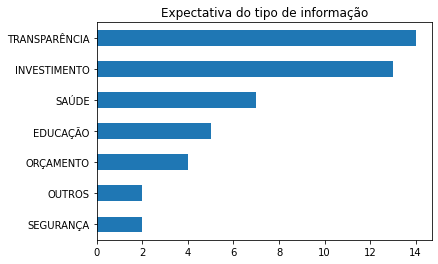

In [43]:
labels = {'ANSWER_INVESTMENT': 'INVESTIMENTO', 'ANSWER_HEALTH': 'SAÚDE', 'ANSWER_EDUCATION': 'EDUCAÇÃO', 'ANSWER_SAFETY': 'SEGURANÇA', 'ANSWER_BUDGET': 'ORÇAMENTO', 'ANSWER_TRANSPARENCY': 'TRANSPARÊNCIA', 'ANSWER_OTHERS': 'OUTROS'}
pesquisa[['ANSWER_INVESTMENT', 'ANSWER_HEALTH', 'ANSWER_EDUCATION', 'ANSWER_SAFETY', 'ANSWER_BUDGET', 'ANSWER_TRANSPARENCY', 'ANSWER_OTHERS']].apply(np.sum).rename(index=labels).sort_values().plot(kind='barh', title='Expectativa do tipo de informação')

## Informações Adicionais

In [44]:
pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].value_counts()

O que é gasto por cada secretaria e onde é aplicado                                                                                                  1
Obras inacabadas                                                                                                                                     1
incentivar o mercado de bairros                                                                                                                      1
Os gastos com pagamentos  dos  cargos  de confiança, e  serviços  principalmente sem licitação.                                                      1
Salários , despesas extras , licitações ,e principalmente gastos com a Câmara de veriadores .                                                        1
Informações detalhadas e acessíveis sobre o andamento da atuação dos representantes municipais. Como: assiduidade e projetos propostos               1
Recursos publicos                                                                             

Em relação à pergunta de quais informações seria interessante existirem no portal (indo além do obrigatório), novamente temos respostas únicas para cada respondente. Isso é esperado, decorrente da forma discursiva da coleta dos dados. Faremos a categorização de forma semelhante à pergunta anterior.

In [45]:
pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].fillna('')

In [46]:
pesquisa['SECOND_ANSWER_INVESTMENT'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_investments)

pesquisa['SECOND_ANSWER_HEALTH'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_health)

pesquisa['SECOND_ANSWER_EDUCATION'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_education)

pesquisa['SECOND_ANSWER_SAFETY'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_safety)

pesquisa['SECOND_ANSWER_BUDGET'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_budget)

pesquisa['SECOND_ANSWER_TRANSPARENCY'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_public_transparency)

pesquisa['SECOND_ANSWER_OTHERS'] = pesquisa['Que tipo de informação você GOSTARIA que tivesse em um portal de transparência de dados da cidade? (Coisas que vão além do obrigado a ter)'].apply(categorize_expectation_others)

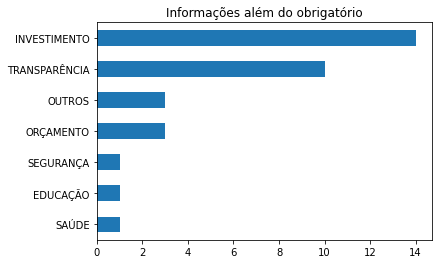

In [47]:
labels = {'SECOND_ANSWER_INVESTMENT': 'INVESTIMENTO', 'SECOND_ANSWER_HEALTH': 'SAÚDE', 'SECOND_ANSWER_EDUCATION': 'EDUCAÇÃO', 'SECOND_ANSWER_SAFETY': 'SEGURANÇA', 'SECOND_ANSWER_BUDGET': 'ORÇAMENTO', 'SECOND_ANSWER_TRANSPARENCY': 'TRANSPARÊNCIA', 'SECOND_ANSWER_OTHERS': 'OUTROS'}
pesquisa[['SECOND_ANSWER_INVESTMENT', 'SECOND_ANSWER_HEALTH', 'SECOND_ANSWER_EDUCATION', 'SECOND_ANSWER_SAFETY', 'SECOND_ANSWER_BUDGET', 'SECOND_ANSWER_TRANSPARENCY', 'SECOND_ANSWER_OTHERS']].apply(np.sum).rename(index=labels).sort_values().plot(kind='barh', title='Informações além do obrigatório')

## Incentivo a Retorno

In [48]:
pesquisa['O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?'].value_counts()

A transparência.                                                       1
Clareza de dados                                                       1
Dados atualizados e diversos.                                          1
A seriedade  e confiabilidade.                                         1
Conteúdos com fontes e pequenos vídeos de resumo                       1
informações Claras e seguras                                           1
Bom conteúdo                                                           1
Informações detalhadas e atualizadas                                   1
Informações atualizadas frequentemente                                 1
Constante atualização, assuntos relevantes para o bairro e cidade.     1
Facilidade na navegação                                                1
A manutenção de informações em tempo real                              1
Saber se meus questionamentos foram aceitos                            1
Interface intuitiva e quantidade de informações.   

Para a questão "O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?", temos novamente respostas diferentes entre os respondentes. Faremos uma categorização assim como nas perguntas anteriores.

In [49]:
pesquisa['THIRD_ANSWER_INFO'] = pesquisa['O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?'].apply(categorize_information)

pesquisa['THIRD_ANSWER_FREQ'] = pesquisa['O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?'].apply(categorize_frequency)

pesquisa['THIRD_ANSWER_USABILITY'] = pesquisa['O que lhe faria voltar a consultar o portal Dados abertos de Feira com frequência?'].apply(categorize_usability)

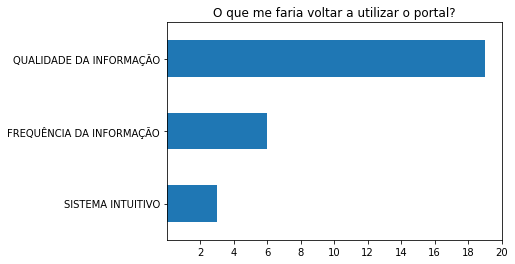

In [50]:
labels = {'THIRD_ANSWER_INFO': 'QUALIDADE DA INFORMAÇÃO', 'THIRD_ANSWER_FREQ': 'FREQUÊNCIA DA INFORMAÇÃO', 'THIRD_ANSWER_USABILITY': 'SISTEMA INTUITIVO'}
pesquisa[['THIRD_ANSWER_INFO', 'THIRD_ANSWER_FREQ', 'THIRD_ANSWER_USABILITY']].apply(np.sum).rename(index=labels).sort_values().plot(kind='barh', title='O que me faria voltar a utilizar o portal?', xticks=np.arange(2, 22, 2))

## Outras Fontes de Informação

In [51]:
pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].fillna('Nenhum')
pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].value_counts()

Nenhum                                                            17
Acorda cidade                                                      2
Só o da prefeitura                                                 1
Acorda cidade                                                      1
Sites informativos e midiáticos da cidade de Feira de Santana.     1
Prefeitura, jornais, DO...                                         1
Site do Acorda cidade                                              1
Acorda Cidade                                                      1
Name: Quais sites você usa ou já usou para pesquisar esses dados?, dtype: int64

Podemos ver que existem algumas respostas semelhantes, embora a maior parte dos respondentes não tenha informado outra fonte de informação dos dados municipais. De qualquer forma, precisamos categorizar algumas das informações. Apesar do Acorda Cidade ser um website, pela quantidade expressiva de respostas, vamos separá-lo em uma categoria própria.

In [52]:
def categorize_acorda_cidade(answer):
    if any(x in answer.lower().strip() for x in ['acorda cidade']):
        return 1
    return 0

def categorize_prefeitura(answer):
    if any(x in answer.lower().strip() for x in ['prefeitura']):
        return 1
    return 0

def categorize_diario_oficial(answer):
    if any(x in answer for x in ['DO', 'oficial']):
        return 1
    return 0

def categorize_sites(answer):
    if any(x in answer.lower() for x in ['sites', 'jornal', 'jornais']):
        return 1
    return 0

def categorize_none(answer):
    if any(x in answer.lower() for x in ['nenhum']):
        return 1
    return 0
    

In [56]:
pesquisa['FOURTH_ANSWER_ACORDA_CIDADE'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].apply(categorize_acorda_cidade)

pesquisa['FOURTH_ANSWER_CITY_HALL'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].apply(categorize_prefeitura)

pesquisa['FOURTH_ANSWER_OFFICIAL'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].apply(categorize_diario_oficial)

pesquisa['FOURTH_ANSWER_WEBSITES'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].apply(categorize_sites)

pesquisa['FOURTH_ANSWER_NONE'] = pesquisa['Quais sites você usa ou já usou para pesquisar esses dados?'].apply(categorize_none)

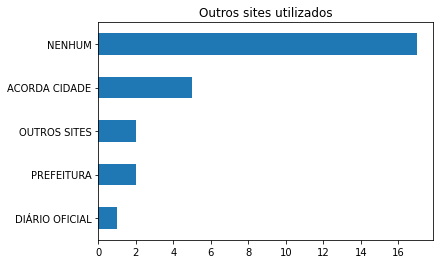

In [57]:
labels = {'FOURTH_ANSWER_ACORDA_CIDADE': 'ACORDA CIDADE', 'FOURTH_ANSWER_CITY_HALL': 'PREFEITURA', 'FOURTH_ANSWER_OFFICIAL': 'DIÁRIO OFICIAL', 'FOURTH_ANSWER_WEBSITES': 'OUTROS SITES', 'FOURTH_ANSWER_NONE': 'NENHUM'}
pesquisa[['FOURTH_ANSWER_ACORDA_CIDADE', 'FOURTH_ANSWER_CITY_HALL', 'FOURTH_ANSWER_OFFICIAL', 'FOURTH_ANSWER_WEBSITES', 'FOURTH_ANSWER_NONE']].apply(np.sum).rename(index=labels).sort_values().plot(kind='barh', title='Outros sites utilizados')

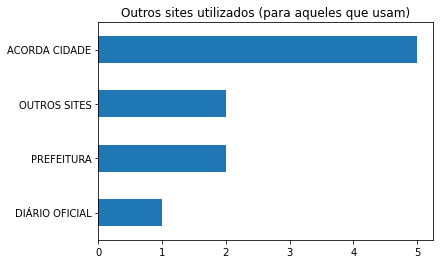

In [55]:
labels = {'FOURTH_ANSWER_ACORDA_CIDADE': 'ACORDA CIDADE', 'FOURTH_ANSWER_CITY_HALL': 'PREFEITURA', 'FOURTH_ANSWER_OFFICIAL': 'DIÁRIO OFICIAL', 'FOURTH_ANSWER_WEBSITES': 'OUTROS SITES'}
pesquisa[['FOURTH_ANSWER_ACORDA_CIDADE', 'FOURTH_ANSWER_CITY_HALL', 'FOURTH_ANSWER_OFFICIAL', 'FOURTH_ANSWER_WEBSITES']].apply(np.sum).rename(index=labels).sort_values().plot(kind='barh', title='Outros sites utilizados (para aqueles que usam)')